In [1]:
%load_ext autoreload
%autoreload 2
# %cd /p/mmcardiac/Jerry/code/CINE-DENSE-Translation
%cd /home/jx8fh/Projects/LaMoD
import numpy as np
import torch
import matplotlib.pyplot as plt
from pathlib import Path
from modules.data import check_dict

/sfs/gpfs/tardis/home/jx8fh/Projects/LaMoD


In [2]:
# load cine-DENSE data
# cine_DENSE_fname = '/p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-cine-DENSE-data/2024-04-21-matched-cine-DENSE-from-Yu-all-with-resampled.npy'
cine_DENSE_fname = '/scratch/jx8fh/2024-04-21-matched-cine-DENSE-from-Yu-all-with-resampled.npy'
cine_DENSE_data = np.load(cine_DENSE_fname, allow_pickle=True).tolist()
check_dict(cine_DENSE_data[0])

AnalysisInfo                                                 dict_keys(['ResampleMethod', 'ResampleDistance', 'SpatialSmoothing', 'TemporalOrder', 'Xseed', 'Yseed', 'Zseed', 'FramesForAnalysis', 'Nmodel', 'PositionA', 'PositionB', 'Clockwise'])
AnalysisInstanceUID                                          1.3.6.1.4.1.9590.100.1.2.64946301013757307506911904523491151334
DENSEInfo                                                    dict_keys(['Name', 'UID', 'Type', 'MagIndex', 'PhaIndex', 'Number', 'PixelSpacing', 'Scale', 'EncFreq', 'SwapFlag', 'NegFlag'])
DENSE_Eul_displacement_field_Multipliers                     (3,)                
DENSE_Eul_displacement_field_X                               (48, 48, 51)        
DENSE_Eul_displacement_field_Y                               (48, 48, 51)        
DENSE_Lag_displacement_field_X                               (48, 48, 51)        
DENSE_Lag_displacement_field_Y                               (48, 48, 51)        
DENSE_frame_indices_with_myo_co

In [3]:
# load feature tracking results
feature_tracking_fname = '/scratch/jx8fh/2024-06-22-MICCAI-ShapeMI-Workshop-data/2024-04-21-matched-cine-DENSE-from-Yu-all-feature-tracking.npy'
# feature_tracking_fname = '/p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-cine-DENSE-data/2024-04-21-matched-cine-DENSE-from-Yu-all-feature-tracking.npy'
feature_tracking_data = np.load(feature_tracking_fname, allow_pickle=True).tolist()
check_dict(feature_tracking_data[0])

AnalysisInstanceUID                                          1.3.6.1.4.1.9590.100.1.2.64946301013757307506911904523491151334
DENSE_myo_mask_bbox                                          (34, 82, 40, 88)    
DENSE_n_frames_all                                           51                  
DENSE_slice_SwapFlag                                         1                   
DENSE_slice_idx                                              0                   
DENSE_slice_location                                         76.947609505431     
DENSE_slice_mat_filename                                     /p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-DENSE-data/033_S01_base_auto.1_ROI.1.mat
cine_has_separate_mat_file                                   True                
cine_sep_mat_filename                                        /p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-analyzed-cine-data/CRT33/trufi_cine_sa_p2_13.mat
cine_slice_has_contour                                       

In [4]:
# load previous experimnents results
data_recompute_strain_fname_prev = '/scratch/jx8fh/2024-06-22-MICCAI-ShapeMI-Workshop-data/2024-05-04-matched-cine-DENSE-from-Yu-all-recompute-strain-DIL2.npy'
# data_recompute_strain_fname_prev = '/p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-cine-DENSE-data/2024-05-04-matched-cine-DENSE-from-Yu-all-recompute-strain-DIL2.npy'
data_recompute_strain_prev = np.load(data_recompute_strain_fname_prev, allow_pickle=True).tolist()
check_dict(data_recompute_strain_prev[0])

CCImg                                                        (48, 48, 51)        
CCImg_GT                                                     (128, 128, 51)      
DENSE_strain                                                 dict_keys(['origin', 'insertion', 'CCs4', 'CCs6', 'CCs18', 'Seg4', 'Seg6', 'Seg18', 'layerid_map', 'CCs4_endo', 'CCs6_endo', 'CCs18_endo', 'CCs4_mid', 'CCs6_mid', 'CCs18_mid', 'CCs4_epi', 'CCs6_epi', 'CCs18_epi', 'CCs4Resampled', 'CCs4_endoResampled', 'CCs4_epiResampled', 'CCs4_midResampled', 'CCs6Resampled', 'CCs6_endoResampled', 'CCs6_epiResampled', 'CCs6_midResampled', 'CCs18Resampled', 'CCs18_endoResampled', 'CCs18_epiResampled', 'CCs18_midResampled'])
Diffusion_cine_strain                                        dict_keys(['origin', 'insertion', 'CCs4', 'CCs6', 'CCs18', 'Seg4', 'Seg6', 'Seg18', 'CCs4Resampled', 'CCs6Resampled', 'CCs18Resampled'])
UNetR_cine_strain                                            dict_keys(['origin', 'insertion', 'CCs4', 'CCs6', 'CCs1

In [5]:
# load TransUNet experimnents results
# data_recompute_strain_fname_transunet = '/p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-cine-DENSE-data/2024-06-22-matched-cine-DENSE-from-Yu-all-recompute-strain-DIL2-TransUNet.npy'
data_recompute_strain_fname_transunet = '/scratch/jx8fh/2024-06-22-MICCAI-ShapeMI-Workshop-data/2024-06-22-matched-cine-DENSE-from-Yu-all-recompute-strain-DIL2-TransUNet.npy'
data_recompute_strain_transunet = np.load(data_recompute_strain_fname_transunet, allow_pickle=True).tolist()

In [6]:
# len(strain_curve_MotionDecoder)

In [7]:
# datum_repeat_preds_fname

In [8]:
# glob.glob(str(data_dir / f'LaMoD-cine-*{datum_idx:03d}-*.npy'))

NameError: name 'glob' is not defined

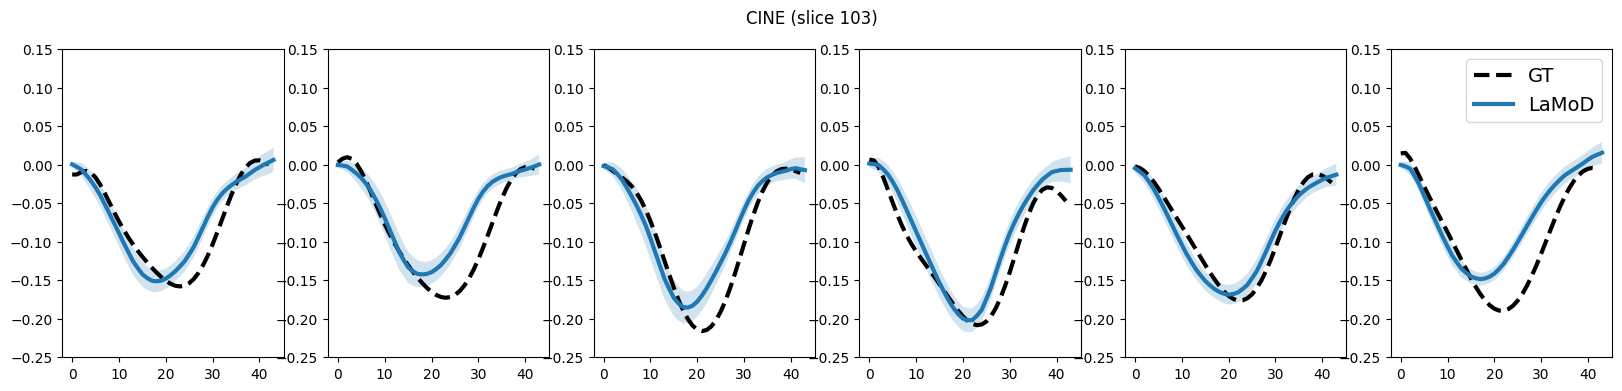

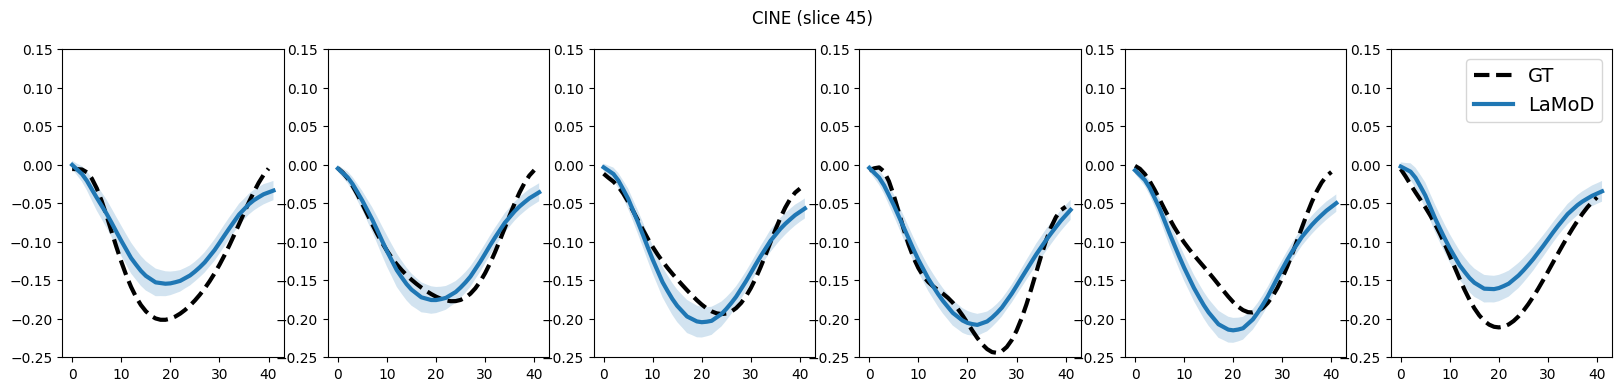

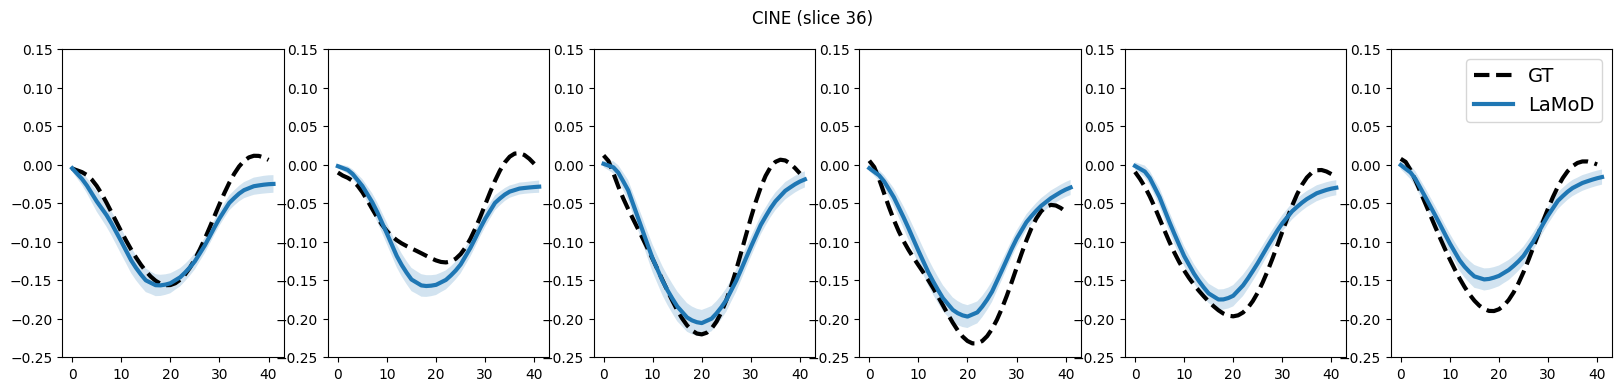

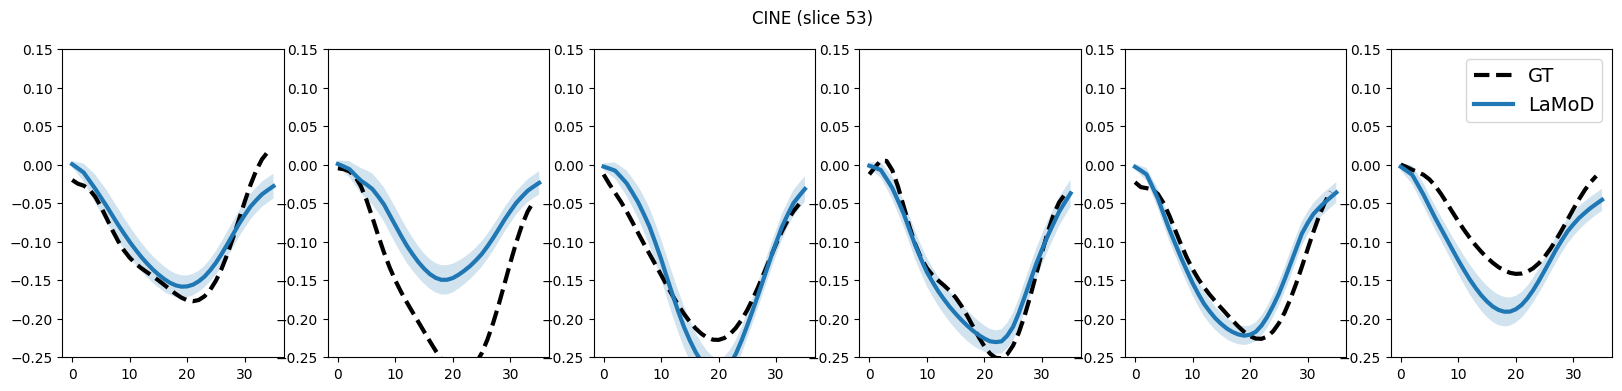

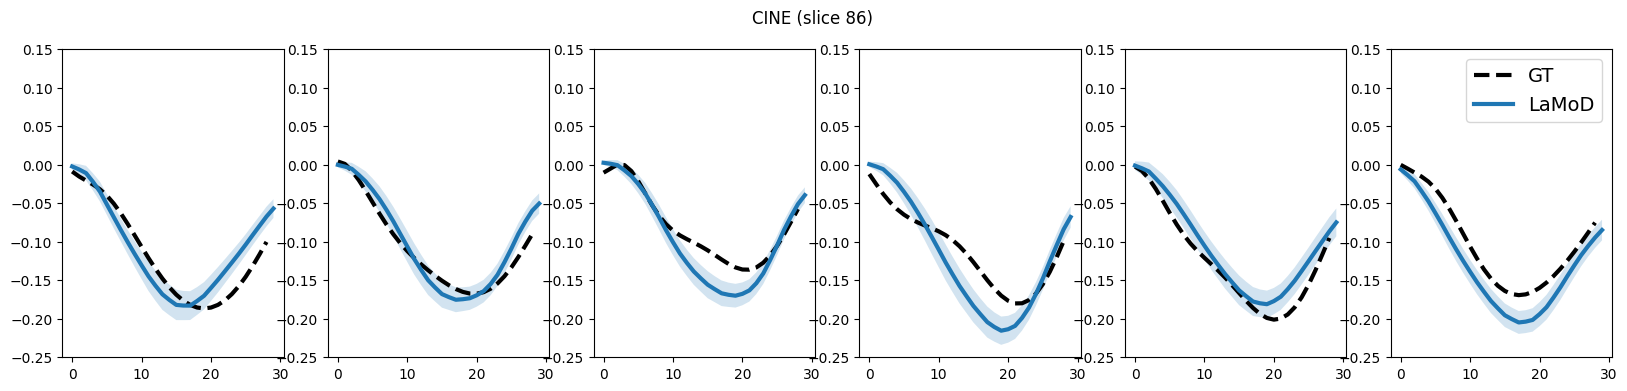

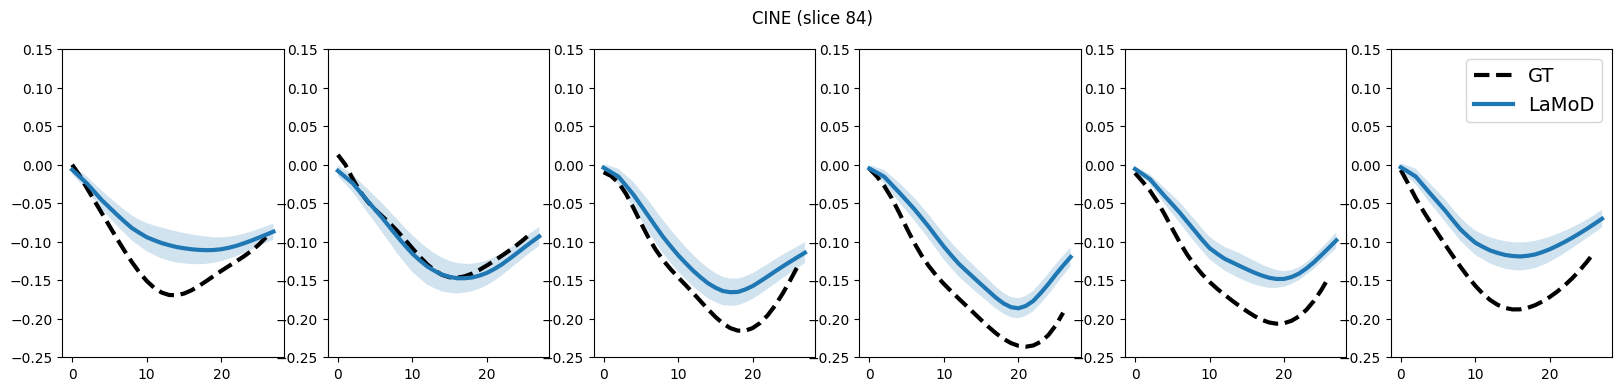

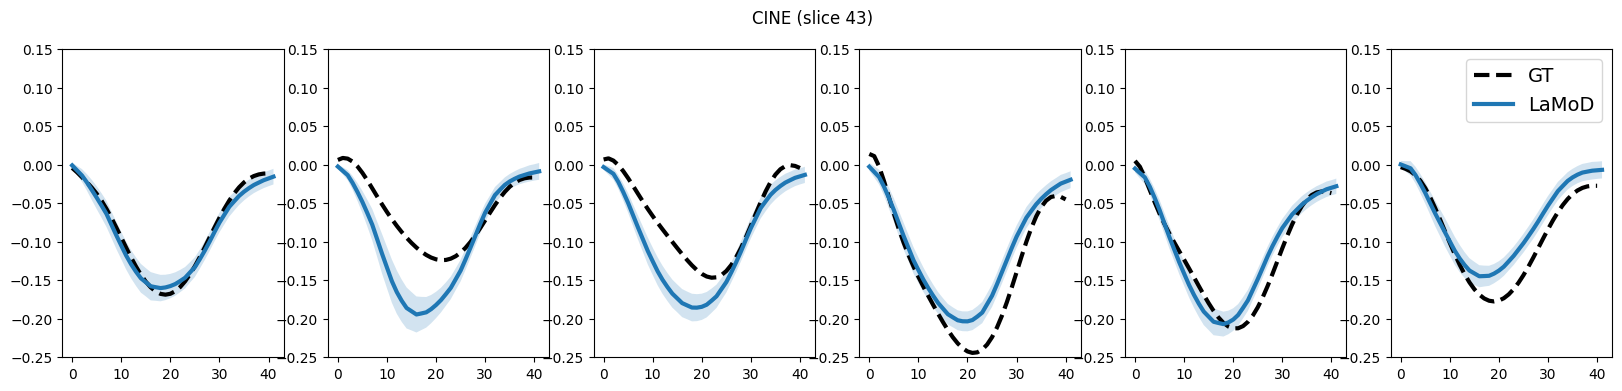

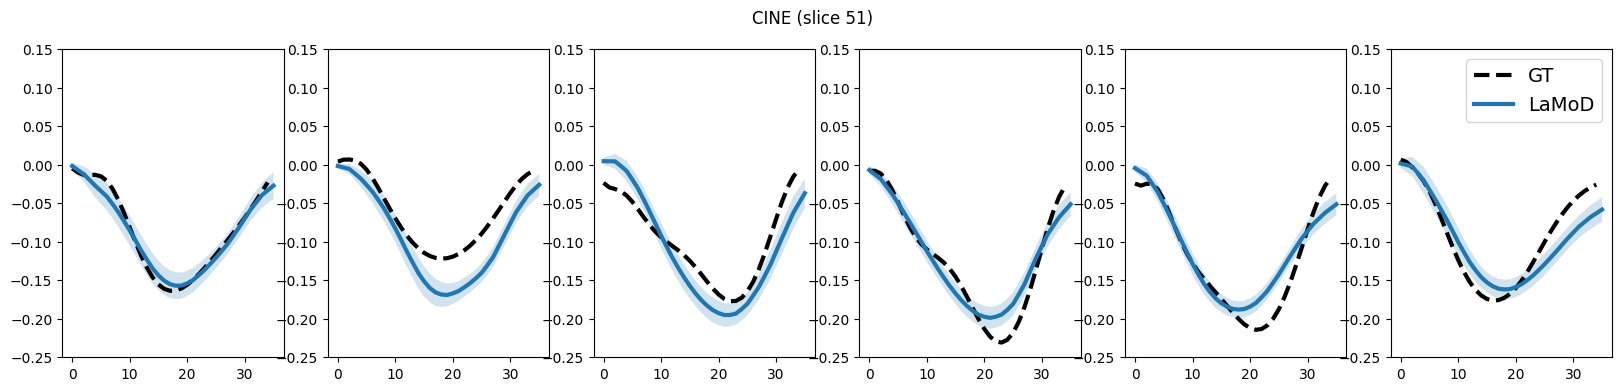

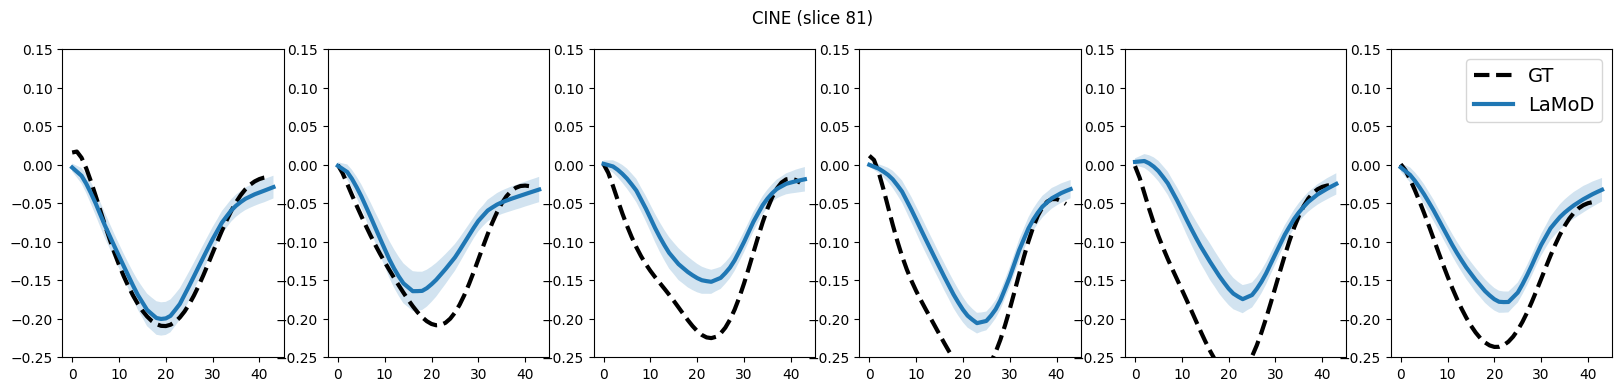

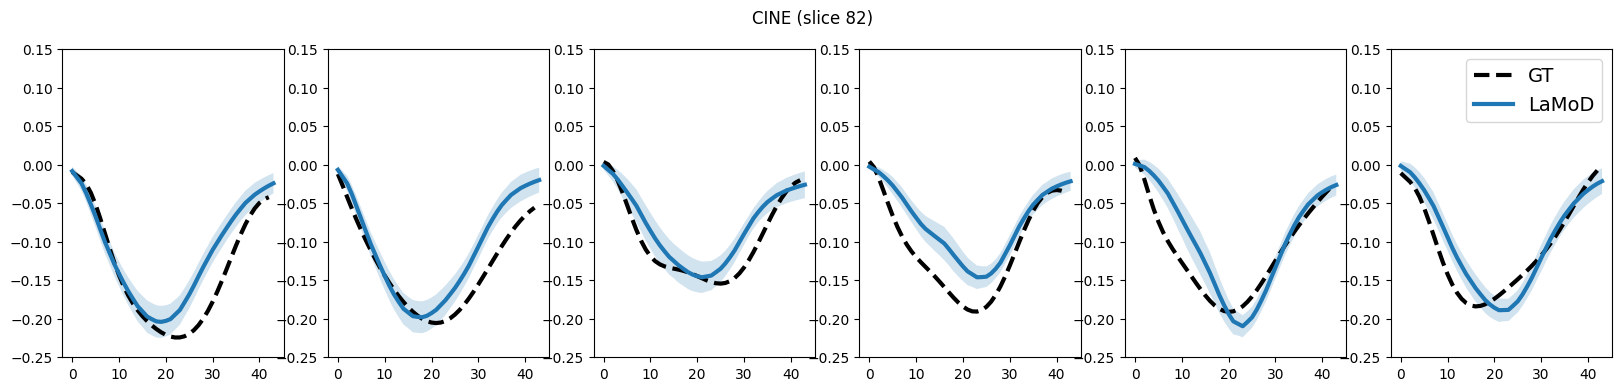

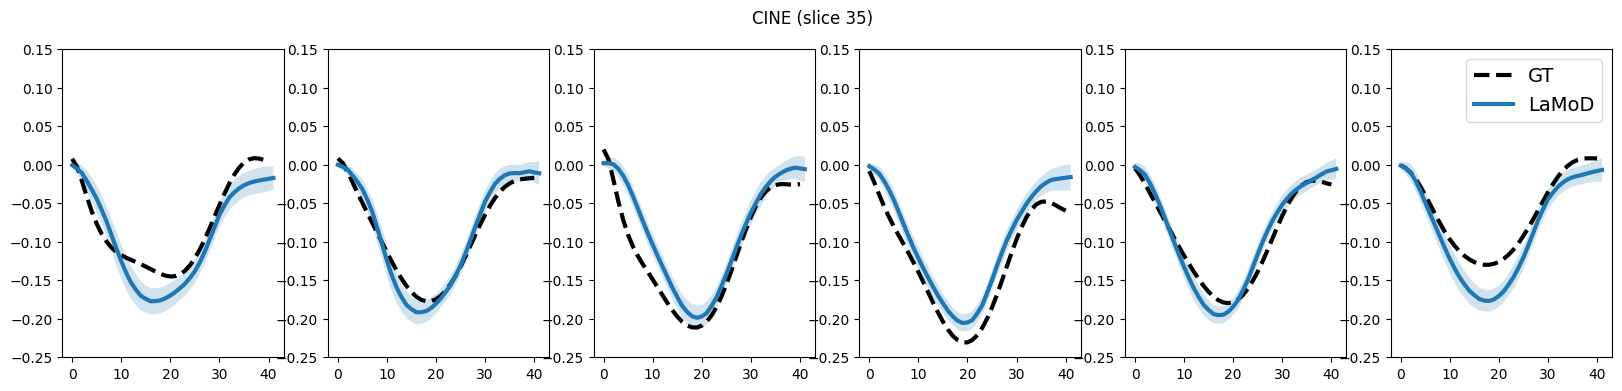

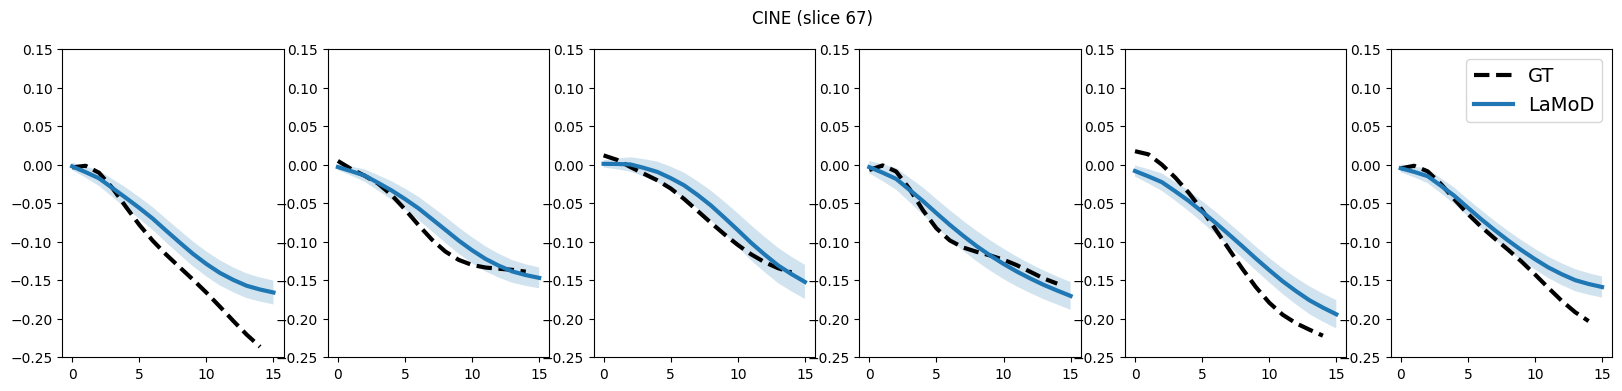

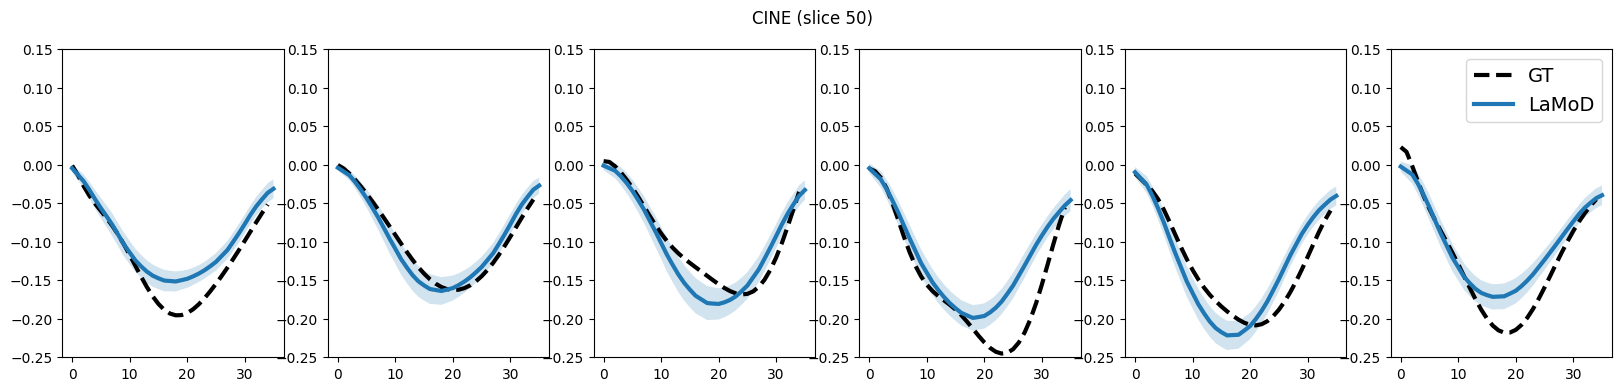

In [10]:
import os
import glob
from pathlib import Path
data_dir = Path('/scratch/jx8fh/2025-01-16-LaMoD-variability-split-100/cine_strain/')
# save_one_row_dir = '/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-06-plot-all-strain-curves/one-row'
# for datum_idx in range(len(strain_prev_data['MotionDecoder1x1']['DENSE_strain_segmental_pred'])):
linewidth_GT = 3
linewidth_ours = 3
linewidth_baseline = 1.5
n_cut_frames = 15
# for datum_idx in [103, 45, 36, 53, 86, 84, 43, 51, 81, 82, 35, 67, 50]:
for datum_idx in [103, 45, 36, 53, 86, 84, 43, 51, 81, 82, 35, 67, 50]:
# for datum_idx in [45]:
# for datum_idx in [59]:
    # datum_repeat_preds_fname = [Path(data_dir, matched_fname) for matched_fname in filter_filenames_by_idx([Path(f).name for f in all_fnames], datum_idx)][0]
    datum_repeat_preds_fname = glob.glob(str(data_dir / f'LaMoD-cine-{datum_idx:03d}-*.npy'))[0]
    datum_repeat_preds = np.load(datum_repeat_preds_fname, allow_pickle=True).tolist()

    fig, axs = plt.subplots(1, 6, figsize=(20, 4))
    for sector_idx in range(6):
        strain_curve_GT = data_recompute_strain_prev[datum_idx]['DENSE_strain']['CCs6'][sector_idx, :-1]
        strain_curve_MotionDecoder = data_recompute_strain_prev[datum_idx]['MotionDecoder1x1_cine_strain']['CCs6Resampled'][sector_idx]
        strain_curve_UNetR = data_recompute_strain_prev[datum_idx]['UNetROri_cine_strain']['CCs6Resampled'][sector_idx, :-1]
        strain_curve_StrainNet = data_recompute_strain_prev[datum_idx]['StrainNetOri_cine_strain']['CCs6Resampled'][sector_idx, :-1]
        strain_curve_TransUNet = data_recompute_strain_transunet[datum_idx]['TransUNetOri_cine_strain']['CCs6Resampled'][sector_idx, :-1]

        strainmat_GT = data_recompute_strain_prev[datum_idx]['DENSE_strain']['CCs6']
        strainmat_GT_max = np.max(strainmat_GT[~np.isnan(strainmat_GT)])    
        strainmat_GT_min = np.min(strainmat_GT[~np.isnan(strainmat_GT)])

        # if datum_idx in [59, 79]:
        #     sector_strain_curves_pred_mean_raw = np.mean([pred['CCs6_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)
        #     sector_strain_curves_pred_std_raw = np.std([pred['CCs6_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)
        #     # interpolate to match the length of the strain_curve_MotionDecoder length
        #     sector_strain_curves_pred_mean = np.interp(np.linspace(0, 1, len(strain_curve_MotionDecoder)), np.linspace(0, 1, len(sector_strain_curves_pred_mean_raw)), sector_strain_curves_pred_mean_raw)
        #     sector_strain_curves_pred_std = np.interp(np.linspace(0, 1, len(strain_curve_MotionDecoder)), np.linspace(0, 1, len(sector_strain_curves_pred_std_raw)), sector_strain_curves_pred_std_raw)
        # else:
        sector_strain_curves_pred_mean = np.mean([pred['CCs6Resampled_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)
        sector_strain_curves_pred_std = np.std([pred['CCs6Resampled_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)

        # min_curve_len = min(len(strain_curve_GT), len(strain_curve_MotionDecoder), len(strain_curve_UNetR), len(strain_curve_StrainNet), len(strain_curve_TransUNet), len(sector_strain_curves_pred_mean))
        min_curve_len = -1

        if n_cut_frames > 0:
            axs[sector_idx].plot(strain_curve_GT[:-n_cut_frames], label='GT', linestyle='--', color='black', linewidth=linewidth_GT)
            

            # axs[sector_idx].plot(strain_curve_UNetR[:-n_cut_frames], label='UNetR', linewidth=linewidth_baseline, color='tab:green')
            # axs[sector_idx].plot(strain_curve_StrainNet[:-n_cut_frames], label='StrainNet', linewidth=linewidth_baseline, color='tab:red')
            # axs[sector_idx].plot(strain_curve_TransUNet[:-n_cut_frames], label='TransUNet', linewidth=linewidth_baseline, color='tab:orange')

            # axs[sector_idx].plot(strain_curve_MotionDecoder[:-n_cut_frames], label='LaMoD', linewidth=linewidth_ours, color='tab:blue')
            # axs[sector_idx].fill_between(np.arange(len(strain_curve_MotionDecoder[:-n_cut_frames])), strain_curve_MotionDecoder[:-n_cut_frames] - sector_strain_curves_pred_std[:-n_cut_frames], strain_curve_MotionDecoder[:-n_cut_frames] + sector_strain_curves_pred_std[:-n_cut_frames], alpha=0.2)

            axs[sector_idx].plot(sector_strain_curves_pred_mean[:-n_cut_frames], label='LaMoD', linewidth=linewidth_ours, color='tab:blue')
            axs[sector_idx].fill_between(np.arange(len(sector_strain_curves_pred_mean[:-n_cut_frames])), sector_strain_curves_pred_mean[:-n_cut_frames] - sector_strain_curves_pred_std[:-n_cut_frames], sector_strain_curves_pred_mean[:-n_cut_frames] + sector_strain_curves_pred_std[:-n_cut_frames], alpha=0.2)
        else:
            axs[sector_idx].plot(strain_curve_GT, label='GT', linestyle='--', color='black', linewidth=linewidth_GT)
            

            axs[sector_idx].plot(strain_curve_UNetR, label='UNetR', linewidth=linewidth_baseline, color='tab:green')
            axs[sector_idx].plot(strain_curve_StrainNet, label='StrainNet', linewidth=linewidth_baseline, color='tab:red')
            axs[sector_idx].plot(strain_curve_TransUNet, label='TransUNet', linewidth=linewidth_baseline, color='tab:orange')

            # axs[sector_idx].plot(strain_curve_MotionDecoder, label='LaMoD', linewidth=linewidth_ours, color='tab:blue')
            # axs[sector_idx].fill_between(np.arange(len(strain_curve_MotionDecoder)), strain_curve_MotionDecoder - sector_strain_curves_pred_std, strain_curve_MotionDecoder + sector_strain_curves_pred_std, alpha=0.2)
            axs[sector_idx].plot(sector_strain_curves_pred_mean, label='LaMoD', linewidth=linewidth_ours, color='tab:blue')
            axs[sector_idx].fill_between(np.arange(len(sector_strain_curves_pred_mean)), sector_strain_curves_pred_mean - sector_strain_curves_pred_std, sector_strain_curves_pred_mean + sector_strain_curves_pred_std, alpha=0.2)
        
        # axs[sector_idx].fill_between(np.arange(len(strain_curve_MotionDecoder)), strain_curve_MotionDecoder[:len(strain_curve_MotionDecoder)] - sector_strain_curves_pred_std[:len(strain_curve_MotionDecoder)], strain_curve_MotionDecoder[:len(strain_curve_MotionDecoder)] + sector_strain_curves_pred_std[:len(strain_curve_MotionDecoder)], alpha=0.4)
        # axs[sector_idx].plot(sector_strain_curves_pred_mean, label='LaMoD', linewidth=linewidth_ours, color='blue')
        # axs[sector_idx].fill_between(np.arange(len(sector_strain_curves_pred_mean)), sector_strain_curves_pred_mean - sector_strain_curves_pred_std, sector_strain_curves_pred_mean + sector_strain_curves_pred_std, alpha=0.2)

        # for row_idx in range(5):
            # axs[row_idx, sector_idx+2].set_xticks([])
        # axs[sector_idx].set_ylim(strainmat_GT_min*1.1, strainmat_GT_max*1.1)
        axs[sector_idx].set_ylim(-0.25, 0.15)
        # if n_cut_frames > 0:
        #     axs[sector_idx].set_xlim(0, len(strain_curve_MotionDecoder)-n_cut_frames)
    axs[-1].legend(prop={'size': 14})
    fig.suptitle(f'CINE (slice {datum_idx})')
    # save figure
    # fig.savefig(os.path.join(save_one_row_dir, f'{datum_idx}.png'))

In [ ]:
check_dict(datum_repeat_preds[0])

disp_GT                                                      (2, 48, 48, 51)     
disp_pred                                                    (2, 48, 48, 19)     
disp_pred_unmasked                                           (2, 48, 48, 19)     
mask_raw                                                     (48, 48)            
mask                                                         (48, 48)            
DENSE_frame_time_stamps                                      (51,)               
cine_frame_time_stamps                                       (19,)               
DENSE_myo_mask_bbox                                          (32, 80, 39, 87)    
AnalysisInfo                                                 dict_keys(['ResampleMethod', 'ResampleDistance', 'SpatialSmoothing', 'TemporalOrder', 'Xseed', 'Yseed', 'Zseed', 'FramesForAnalysis', 'Nmodel', 'PositionA', 'PositionB', 'Clockwise'])
cine_rv_insertion_points_rescaled_DENSE48                    (2,)                


In [ ]:
len(datum_repeat_preds)

50

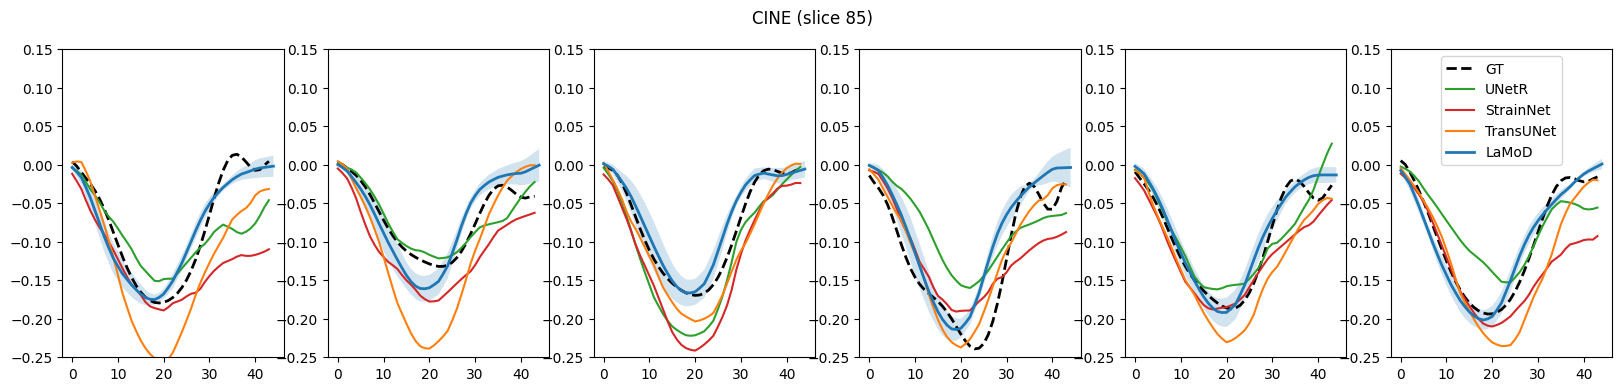

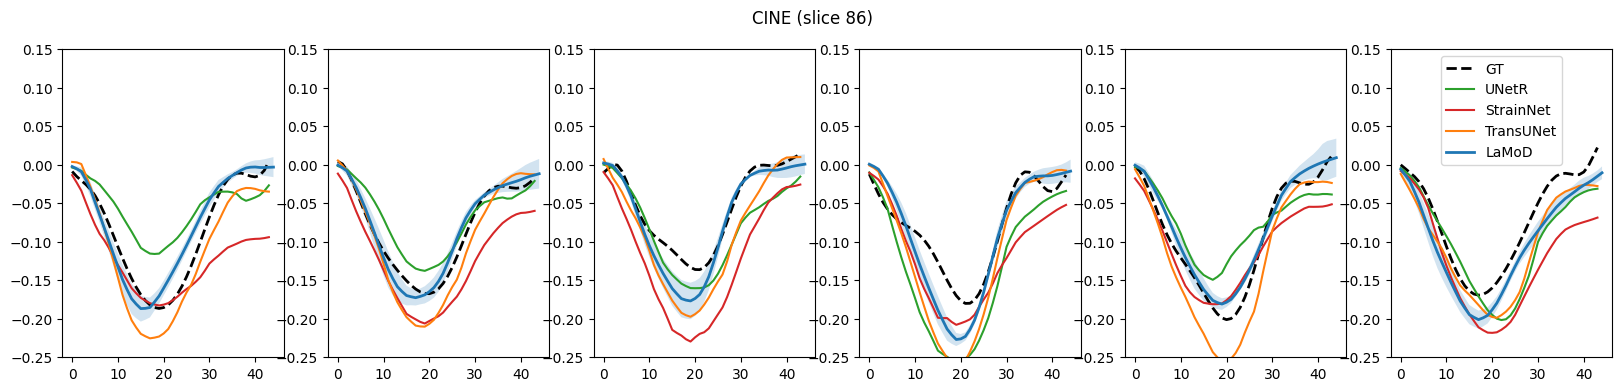

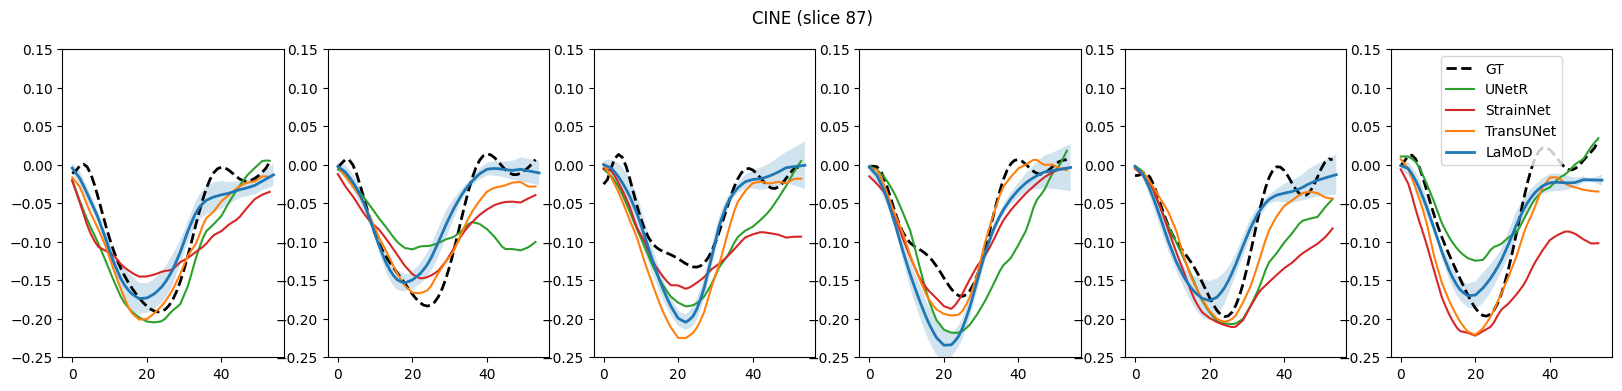

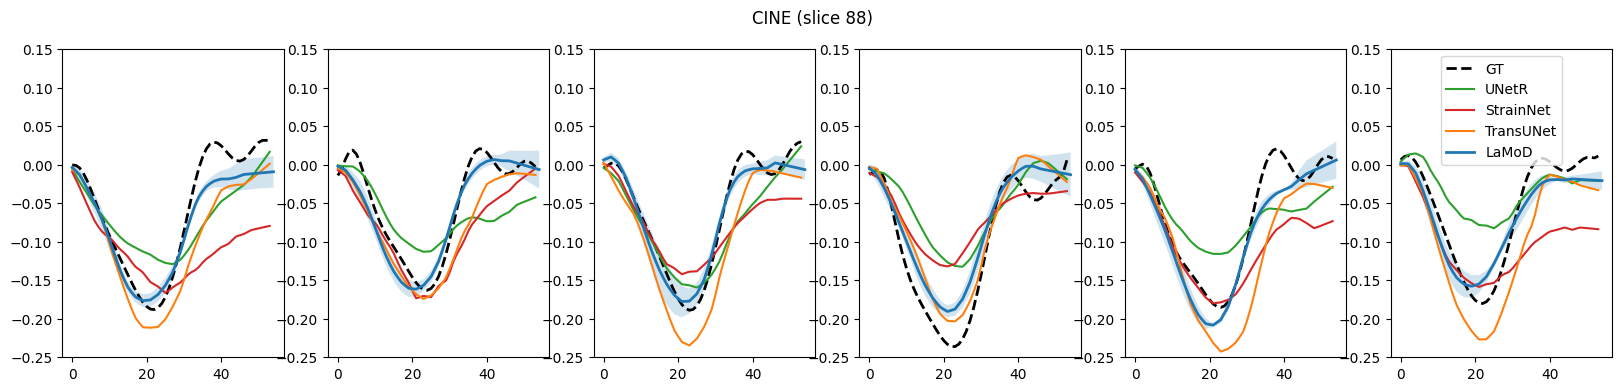

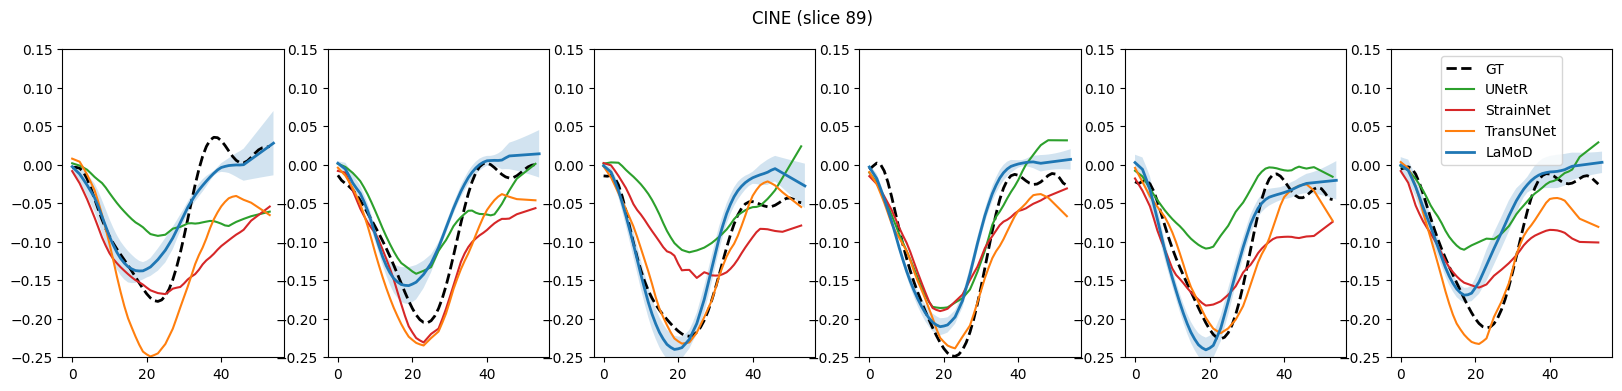

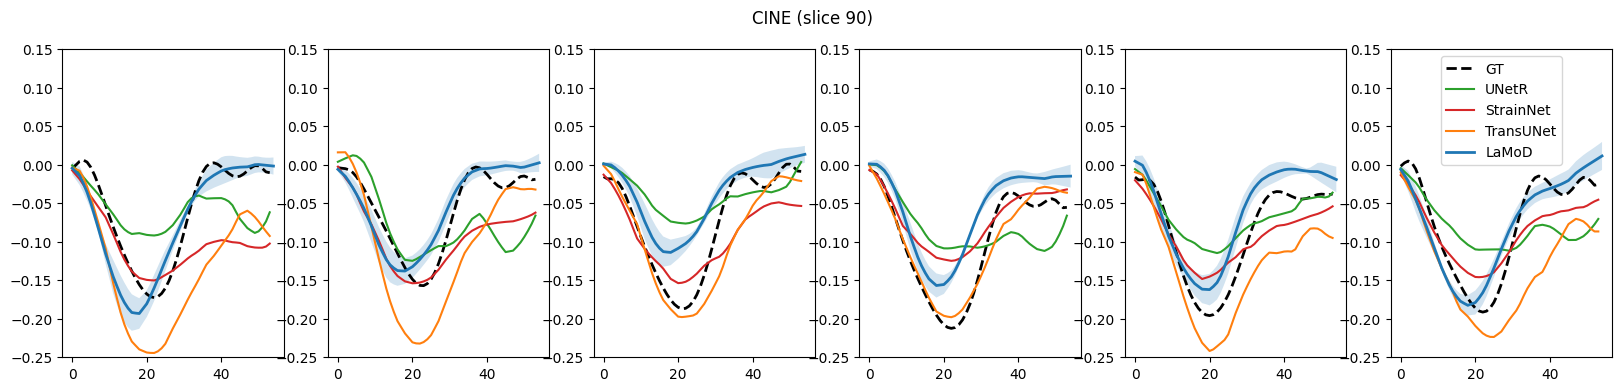

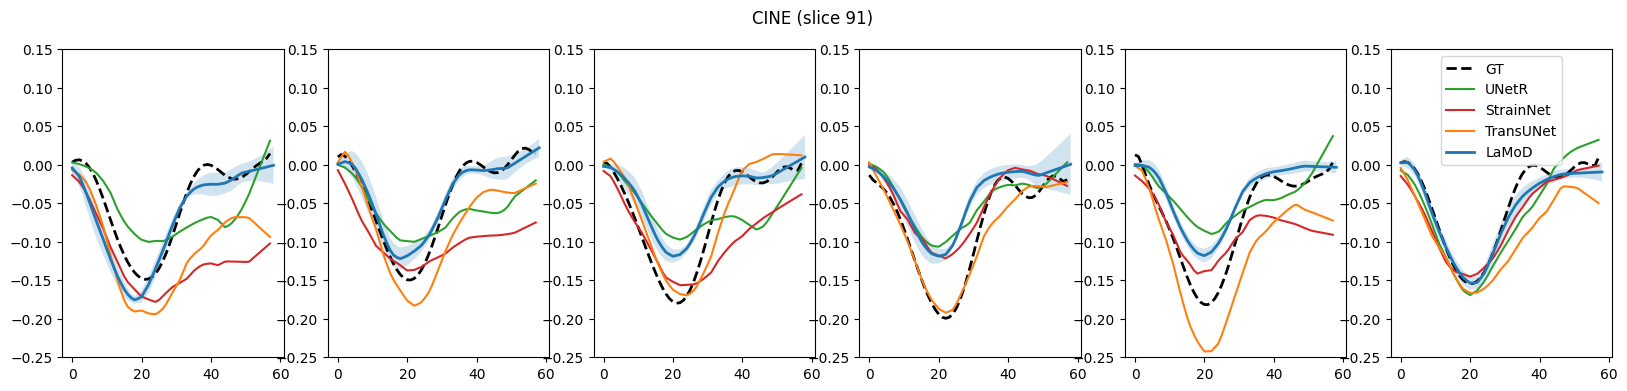

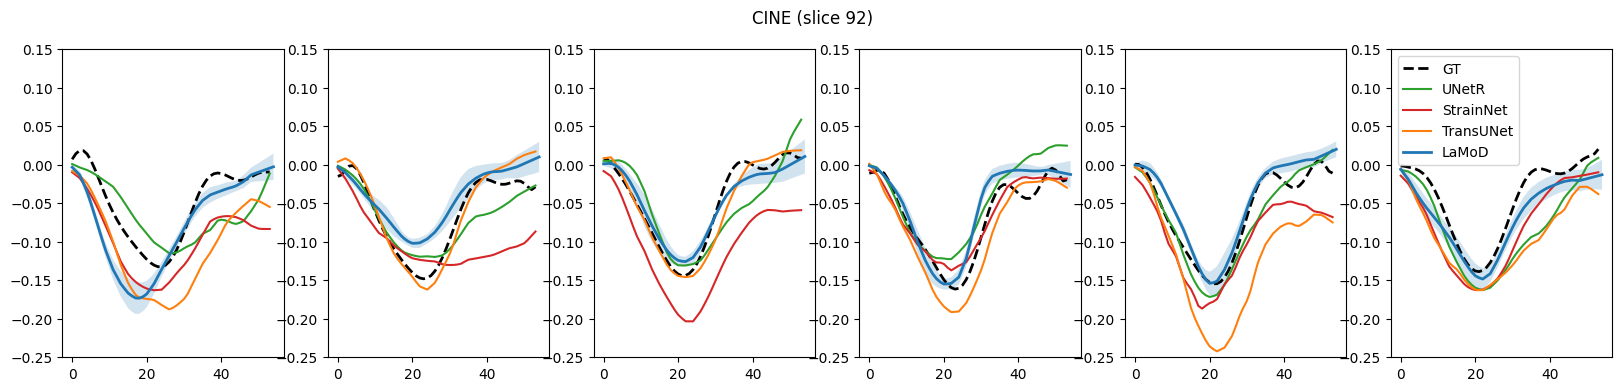

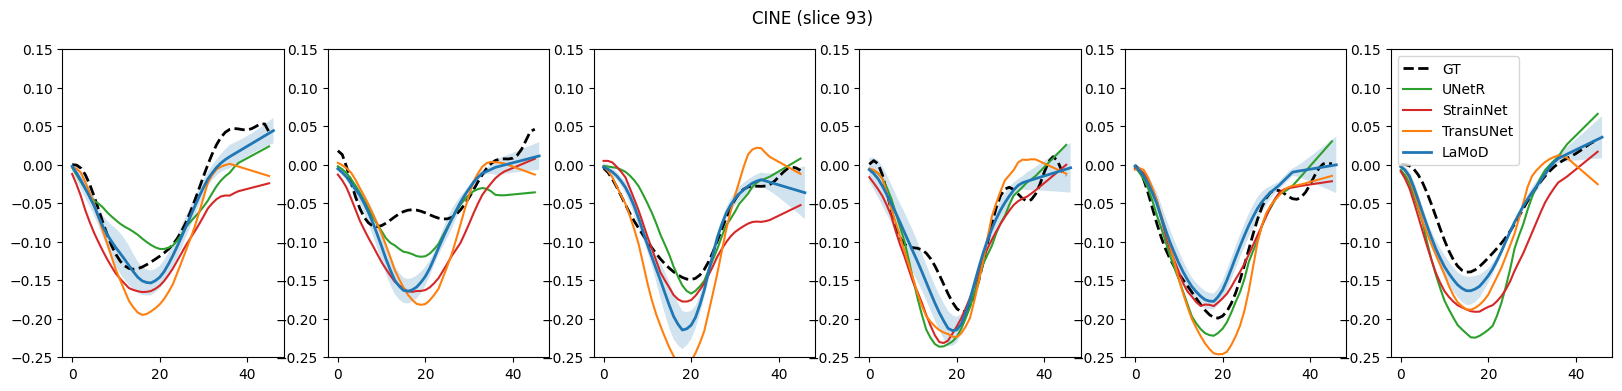

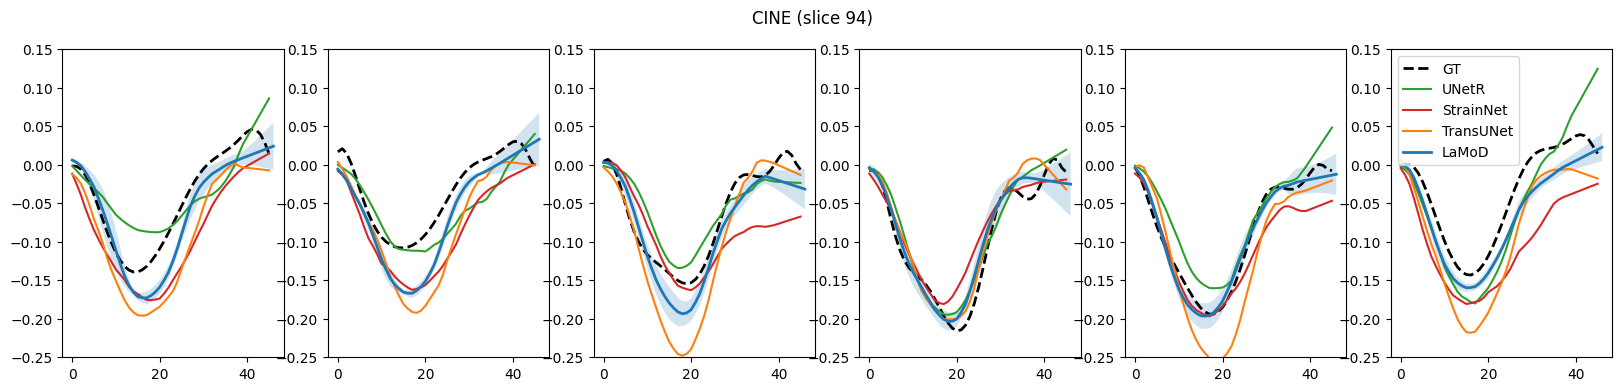

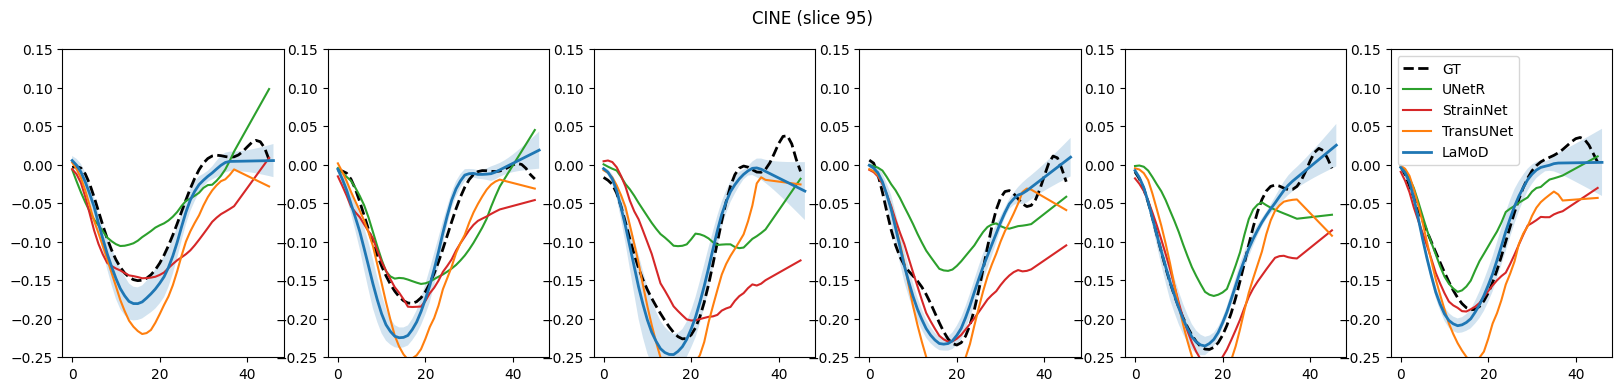

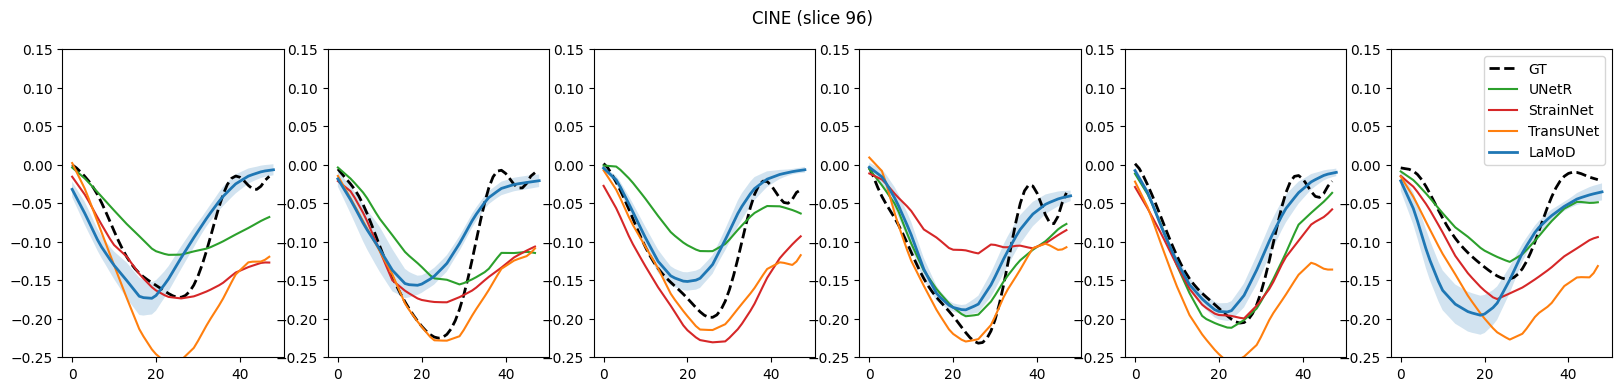

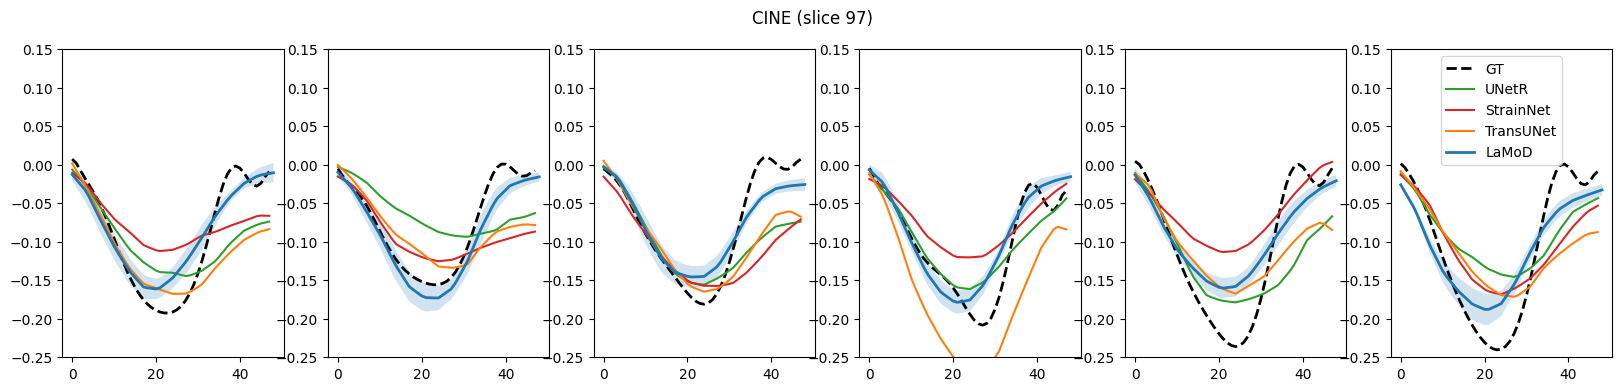

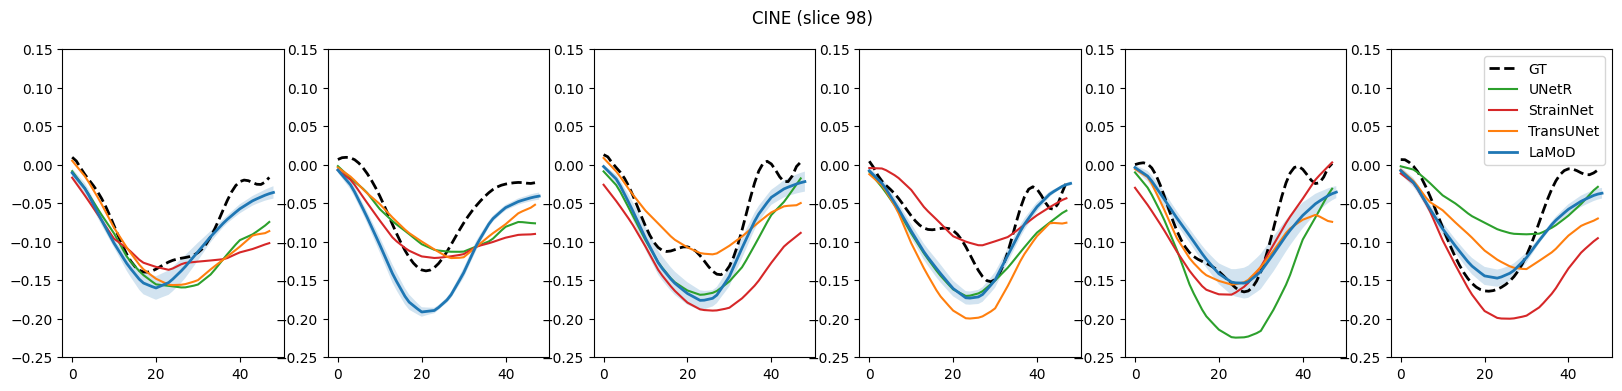

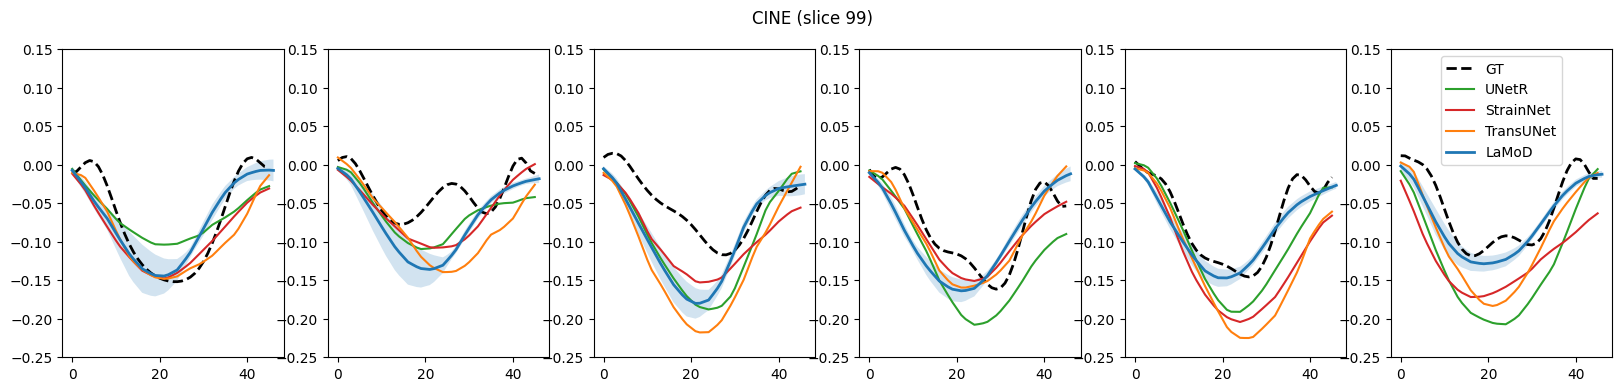

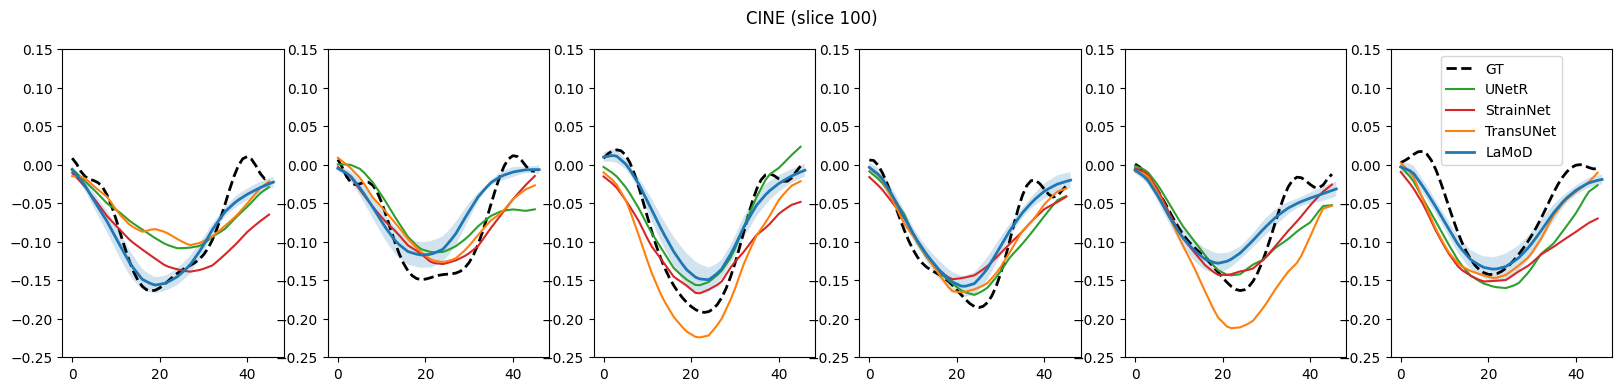

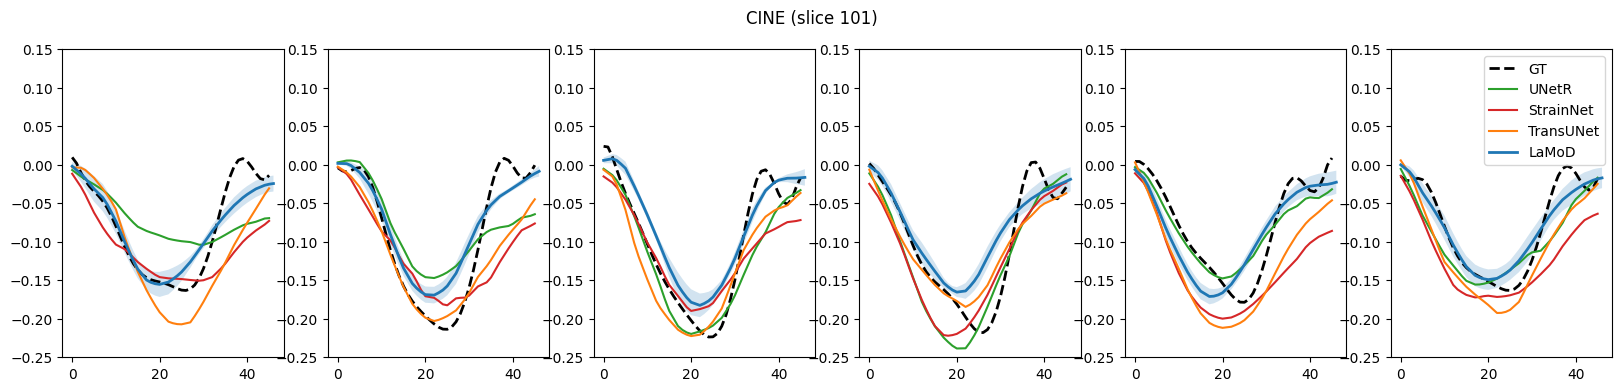

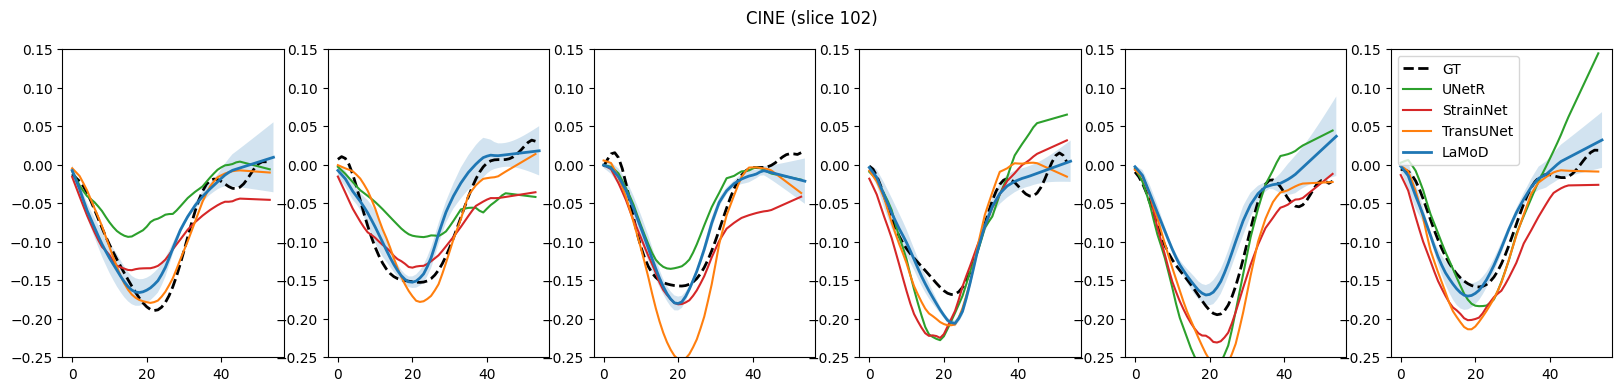

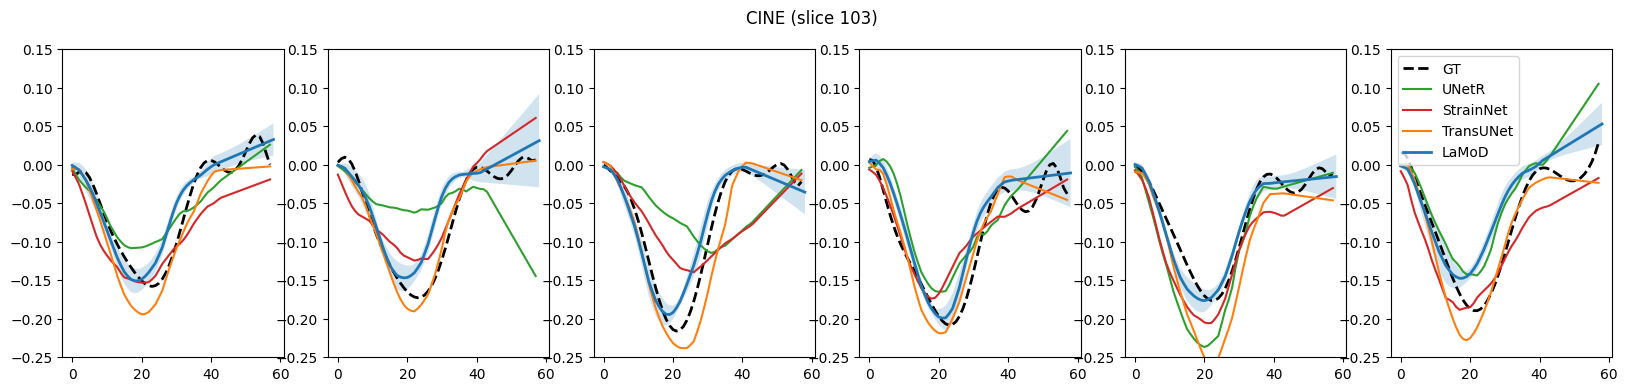

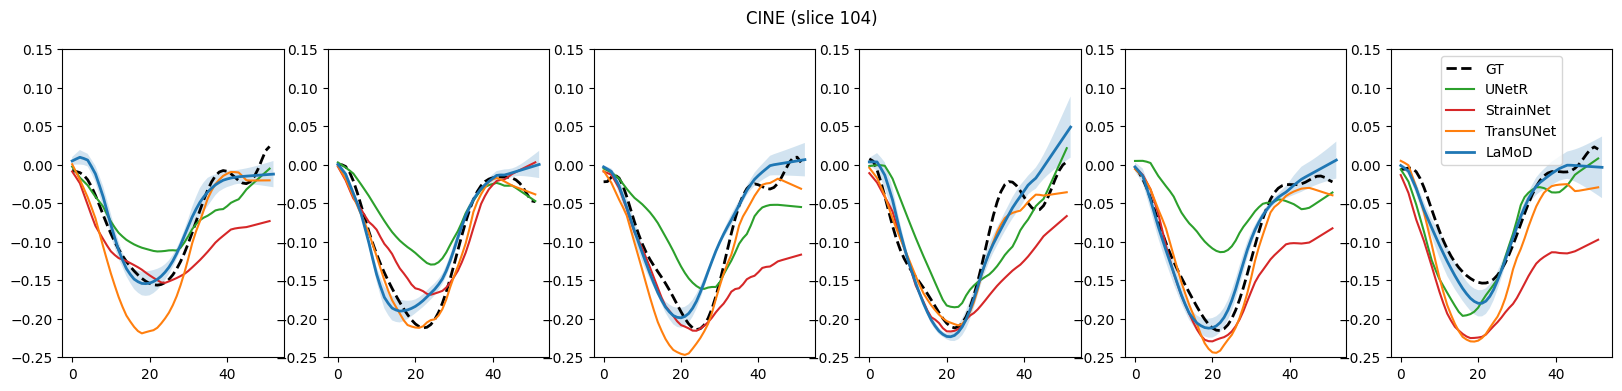

In [ ]:
import os
import glob
from pathlib import Path
data_dir = Path('/scratch/jx8fh/2025-01-04-LaMoD-variability-100/cine/')
# save_one_row_dir = '/home/jx8fh/Projects/LaMoD/debug/notebooks/2025-01-06-plot-all-strain-curves/one-row'
# for datum_idx in range(len(strain_prev_data['MotionDecoder1x1']['DENSE_strain_segmental_pred'])):
linewidth_GT = 2
linewidth_ours = 2
linewidth_baseline = 1.5
n_cut_frames = 0
start_idx = 85
for datum_idx in range(start_idx, start_idx+20):
# for datum_idx in [59]:
    # datum_repeat_preds_fname = [Path(data_dir, matched_fname) for matched_fname in filter_filenames_by_idx([Path(f).name for f in all_fnames], datum_idx)][0]
    datum_repeat_preds_fname = glob.glob(str(data_dir / f'LaMoD-cine-{datum_idx:03d}-*.npy'))[0]
    datum_repeat_preds = np.load(datum_repeat_preds_fname, allow_pickle=True).tolist()

    fig, axs = plt.subplots(1, 6, figsize=(20, 4))
    for sector_idx in range(6):
        strain_curve_GT = data_recompute_strain_prev[datum_idx]['DENSE_strain']['CCs6'][sector_idx, :-1]
        strain_curve_MotionDecoder = data_recompute_strain_prev[datum_idx]['MotionDecoder1x1_cine_strain']['CCs6Resampled'][sector_idx]
        strain_curve_UNetR = data_recompute_strain_prev[datum_idx]['UNetROri_cine_strain']['CCs6Resampled'][sector_idx, :-1]
        strain_curve_StrainNet = data_recompute_strain_prev[datum_idx]['StrainNetOri_cine_strain']['CCs6Resampled'][sector_idx, :-1]
        strain_curve_TransUNet = data_recompute_strain_transunet[datum_idx]['TransUNetOri_cine_strain']['CCs6Resampled'][sector_idx, :-1]

        strainmat_GT = data_recompute_strain_prev[datum_idx]['DENSE_strain']['CCs6']
        strainmat_GT_max = np.max(strainmat_GT[~np.isnan(strainmat_GT)])    
        strainmat_GT_min = np.min(strainmat_GT[~np.isnan(strainmat_GT)])

        # if datum_idx in [59, 79]:
        #     sector_strain_curves_pred_mean_raw = np.mean([pred['CCs6_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)
        #     sector_strain_curves_pred_std_raw = np.std([pred['CCs6_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)
        #     # interpolate to match the length of the strain_curve_MotionDecoder length
        #     sector_strain_curves_pred_mean = np.interp(np.linspace(0, 1, len(strain_curve_MotionDecoder)), np.linspace(0, 1, len(sector_strain_curves_pred_mean_raw)), sector_strain_curves_pred_mean_raw)
        #     sector_strain_curves_pred_std = np.interp(np.linspace(0, 1, len(strain_curve_MotionDecoder)), np.linspace(0, 1, len(sector_strain_curves_pred_std_raw)), sector_strain_curves_pred_std_raw)
        # else:
        sector_strain_curves_pred_mean = np.mean([pred['CCs6Resampled_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)
        sector_strain_curves_pred_std = np.std([pred['CCs6Resampled_pred'][sector_idx] for pred in datum_repeat_preds], axis=0)

        # min_curve_len = min(len(strain_curve_GT), len(strain_curve_MotionDecoder), len(strain_curve_UNetR), len(strain_curve_StrainNet), len(strain_curve_TransUNet), len(sector_strain_curves_pred_mean))
        min_curve_len = -1

        if n_cut_frames > 0:
            axs[sector_idx].plot(strain_curve_GT[:-n_cut_frames], label='GT', linestyle='--', color='black', linewidth=linewidth_GT)
            

            axs[sector_idx].plot(strain_curve_UNetR[:-n_cut_frames], label='UNetR', linewidth=linewidth_baseline, color='tab:green')
            axs[sector_idx].plot(strain_curve_StrainNet[:-n_cut_frames], label='StrainNet', linewidth=linewidth_baseline, color='tab:red')
            axs[sector_idx].plot(strain_curve_TransUNet[:-n_cut_frames], label='TransUNet', linewidth=linewidth_baseline, color='tab:orange')

            # axs[sector_idx].plot(strain_curve_MotionDecoder[:-n_cut_frames], label='LaMoD', linewidth=linewidth_ours, color='tab:blue')
            # axs[sector_idx].fill_between(np.arange(len(strain_curve_MotionDecoder[:-n_cut_frames])), strain_curve_MotionDecoder[:-n_cut_frames] - sector_strain_curves_pred_std[:-n_cut_frames], strain_curve_MotionDecoder[:-n_cut_frames] + sector_strain_curves_pred_std[:-n_cut_frames], alpha=0.2)

            axs[sector_idx].plot(sector_strain_curves_pred_mean[:-n_cut_frames], label='LaMoD', linewidth=linewidth_ours, color='tab:blue')
            axs[sector_idx].fill_between(np.arange(len(sector_strain_curves_pred_mean[:-n_cut_frames])), sector_strain_curves_pred_mean[:-n_cut_frames] - sector_strain_curves_pred_std[:-n_cut_frames], sector_strain_curves_pred_mean[:-n_cut_frames] + sector_strain_curves_pred_std[:-n_cut_frames], alpha=0.2)
        else:
            axs[sector_idx].plot(strain_curve_GT, label='GT', linestyle='--', color='black', linewidth=linewidth_GT)
            

            axs[sector_idx].plot(strain_curve_UNetR, label='UNetR', linewidth=linewidth_baseline, color='tab:green')
            axs[sector_idx].plot(strain_curve_StrainNet, label='StrainNet', linewidth=linewidth_baseline, color='tab:red')
            axs[sector_idx].plot(strain_curve_TransUNet, label='TransUNet', linewidth=linewidth_baseline, color='tab:orange')

            # axs[sector_idx].plot(strain_curve_MotionDecoder, label='LaMoD', linewidth=linewidth_ours, color='tab:blue')
            # axs[sector_idx].fill_between(np.arange(len(strain_curve_MotionDecoder)), strain_curve_MotionDecoder - sector_strain_curves_pred_std, strain_curve_MotionDecoder + sector_strain_curves_pred_std, alpha=0.2)
            axs[sector_idx].plot(sector_strain_curves_pred_mean, label='LaMoD', linewidth=linewidth_ours, color='tab:blue')
            axs[sector_idx].fill_between(np.arange(len(sector_strain_curves_pred_mean)), sector_strain_curves_pred_mean - sector_strain_curves_pred_std, sector_strain_curves_pred_mean + sector_strain_curves_pred_std, alpha=0.2)
        
        # axs[sector_idx].fill_between(np.arange(len(strain_curve_MotionDecoder)), strain_curve_MotionDecoder[:len(strain_curve_MotionDecoder)] - sector_strain_curves_pred_std[:len(strain_curve_MotionDecoder)], strain_curve_MotionDecoder[:len(strain_curve_MotionDecoder)] + sector_strain_curves_pred_std[:len(strain_curve_MotionDecoder)], alpha=0.4)
        # axs[sector_idx].plot(sector_strain_curves_pred_mean, label='LaMoD', linewidth=linewidth_ours, color='blue')
        # axs[sector_idx].fill_between(np.arange(len(sector_strain_curves_pred_mean)), sector_strain_curves_pred_mean - sector_strain_curves_pred_std, sector_strain_curves_pred_mean + sector_strain_curves_pred_std, alpha=0.2)

        # for row_idx in range(5):
            # axs[row_idx, sector_idx+2].set_xticks([])
        # axs[sector_idx].set_ylim(strainmat_GT_min*1.1, strainmat_GT_max*1.1)
        axs[sector_idx].set_ylim(-0.25, 0.15)
        # if n_cut_frames > 0:
        #     axs[sector_idx].set_xlim(0, len(strain_curve_MotionDecoder)-n_cut_frames)
    axs[-1].legend()
    fig.suptitle(f'CINE (slice {datum_idx})')
    # save figure
    # fig.savefig(os.path.join(save_one_row_dir, f'{datum_idx}.png'))